In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [21]:
class LinearModel():
    def __init__(self, formula, data):
        self.formula = formula
        self.data = data
        
    def fit(self):
        predictors = self.formula.split('~')[1].strip()
        target = self.formula.split('~')[0].strip()
        X = self.create_design_matrix(predictors, self.data)
        self.params = self.normal_equation(X, df[target])
    
    
    def create_design_matrix(self, inputs, data):
        """
        Function that creates the design matrix, which contains the data on the independent variables. 
    
        Parameters:
           inputs (str): string that contains all the terms, separated by a +
           data (df): dataframe that contains the necessary data
       
        Output:
           X (df): dataframe of the independent variables
        """
        X = pd.DataFrame()  # Create empty dataframe
        n = len(data)     
        X['bias'] = np.ones(n)  # Add bias, x0=0, to X matrix
        predictors = inputs.split('+')  # Split string of inputs into different erms
        for predictor in predictors:
            predictor = predictor.strip()  # Remove whitespaces
            if 'np.power' in predictor:
                # Polynomial terms
                X[predictor] = np.power(df[predictor[-4]], int(predictor[-2]))
            else:
                X[predictor] = df[predictor]
        return X

    def normal_equation(self, X, y):
        """
        Function that finds the parameters that minimize the residual sum of squares by solving the normal equation.
    
        Parameters:
           x (array of shape (n, m)): array containing the m different predictors
           y (array of shape (n, 1)): array containing the response
       
        Output:
           params (array of shape (m+1,1)): parameters that minimize the residual sum of squares
        """
        params =  np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return params



In [22]:
# Create dataset, y = 2 + 3x + error
x = np.linspace(0, 10, 20)
y = 2 + 3*x + np.random.normal(scale = 5, size = 20)

df = pd.DataFrame({'x': x, 'y':y})
df.head()

,x,y
0,0.000000,-0.642015
1,0.526316,4.520925
2,1.052632,-4.949743
3,1.578947,13.066010
4,2.105263,15.637328


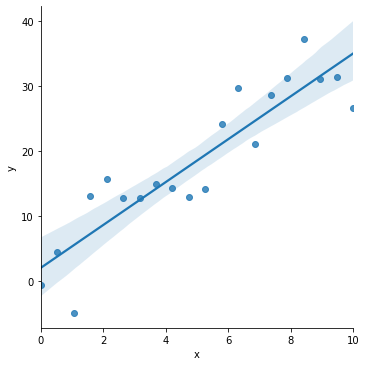

In [23]:
sns.lmplot(x = 'x', y = 'y', data = df)
plt.show()

In [24]:
# Test homemade class
model = LinearModel('y ~ x', data = df)
model.fit()
p = model.params
p

array([2.03945474, 3.29534173])

In [25]:
# Create model with statsmodels
model_sm = sm.OLS.from_formula('y~x', data = df).fit()
model_sm.params

Intercept    2.039455
x            3.295342
dtype: float64

In [26]:
# Create model using sklearn
model_sk = LinearRegression()
model_sk.fit(df[['x']], df['y'])
print(model_sk.intercept_)
print(model_sk.coef_)

2.0394547425582914
[3.29534173]


In [27]:
preds = model_sk.predict(df[['x']])

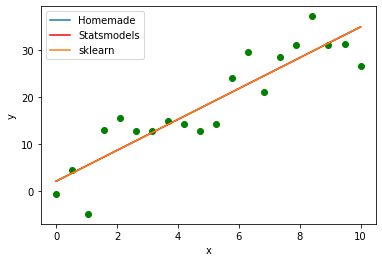

In [28]:
plt.scatter(df['x'], y, color = 'green')
plt.plot(x, p[0] + p[1]*x, label = 'Homemade')
plt.plot(x, model_sm.params[0] + model_sm.params[1]*x, label = 'Statsmodels', color = 'red')
plt.plot(x, preds, label = 'sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [40]:
# Test more complex models, y = 2 + 3x + x^2 + error

x = np.linspace(0, 10, 20)
y = 2 + 3*x + 9*x**2 + np.random.normal(scale = 9, size = 20)

df = pd.DataFrame({'x': x, 'y':y})
df.head()

,x,y
0,0.000000,4.048645
1,0.526316,5.475503
2,1.052632,6.028569
3,1.578947,36.574150
4,2.105263,58.278690


In [41]:
model = LinearModel('y ~ x + np.power(x,2)', df)
model.fit()
p = model.params
p

array([3.46848011, 1.98446752, 9.12830544])

In [42]:
# Create model using statsmodels
model_sm = sm.OLS.from_formula('y ~ x + np.power(x, 2)', data= df).fit()
model_sm.params

Intercept         3.468480
x                 1.984468
np.power(x, 2)    9.128305
dtype: float64

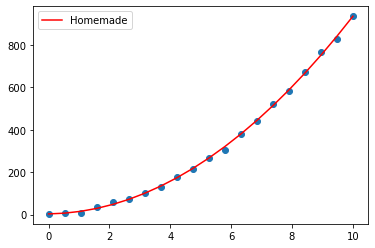

In [43]:
plt.scatter(x, y)
plt.plot(x, p[0] + p[1]*x + p[2]*x**2, color = 'red', label = 'Homemade')
plt.legend()